# Name: Sachin M D

### LetsGrowMore(LGM)

## Task 1

## Iris Flowers Classification ML Project

# Problem Statement

#### The Aim of our project is to build machine learning models to classify flower species into Setosa, Versicolour, and Virginica.

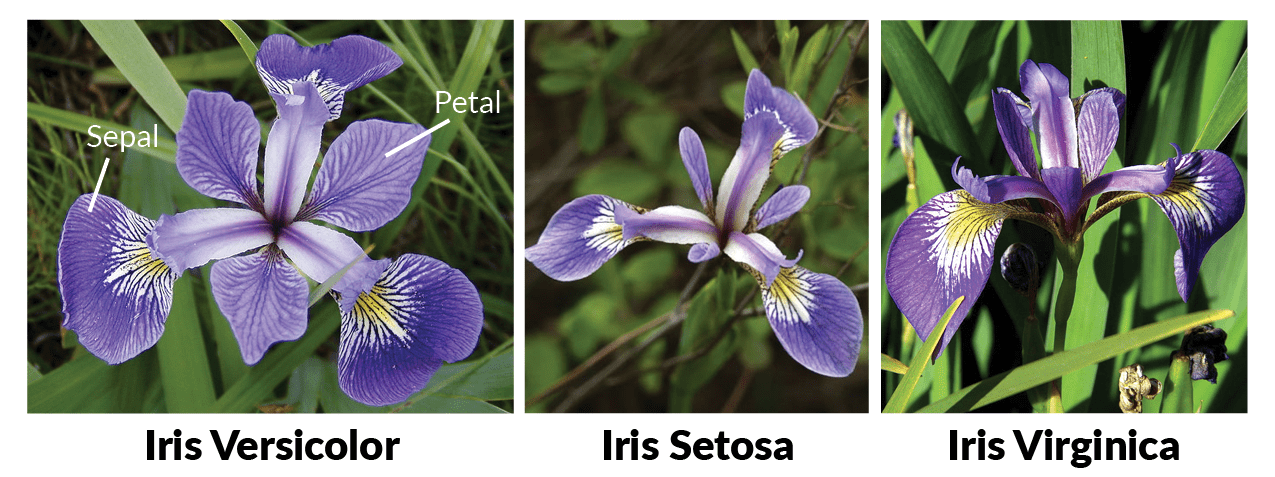

### Background
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. (taken from wikipedia)

    Numerical Features:      Sepal Length, Sepal Width, Petal Length, Petal Width <br>
    Categorical Features:    Species

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
df = pd.read_csv('Iris.csv',index_col='Id')

In [55]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is not Null Values

In [57]:
df.shape

(150, 5)

In [58]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

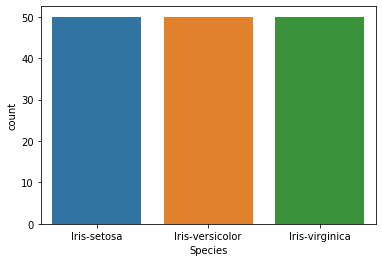

In [59]:
sns.countplot(df.Species)

there are Three Species with 50 Sample Each

In [60]:
df.groupby('Species').agg(['min','max','mean'])

SepalLengthCm             SepalWidthCm              \
                          min  max   mean          min  max   mean   
Species                                                              
Iris-setosa               4.3  5.8  5.006          2.3  4.4  3.418   
Iris-versicolor           4.9  7.0  5.936          2.0  3.4  2.770   
Iris-virginica            4.9  7.9  6.588          2.2  3.8  2.974   

                PetalLengthCm             PetalWidthCm              
                          min  max   mean          min  max   mean  
Species                                                             
Iris-setosa               1.0  1.9  1.464          0.1  0.6  0.244  
Iris-versicolor           3.0  5.1  4.260          1.0  1.8  1.326  
Iris-virginica            4.5  6.9  5.552          1.4  2.5  2.026

In [61]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can clearly see the Standard Deviation of Petal Length is Large is Compare to Other Features, it Indicates that, we use the Length to Understand the Difference between the Features

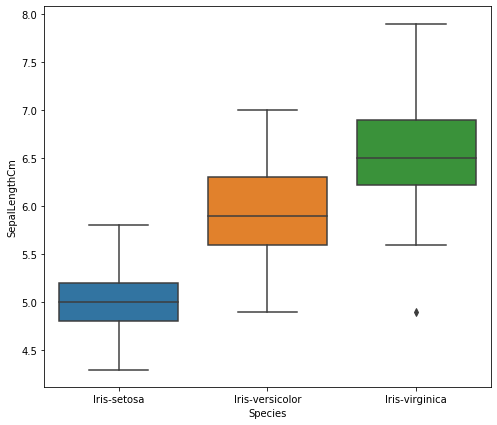

In [62]:
plt.figure(figsize=(8,7))
sns.boxplot('Species','SepalLengthCm',data=df)

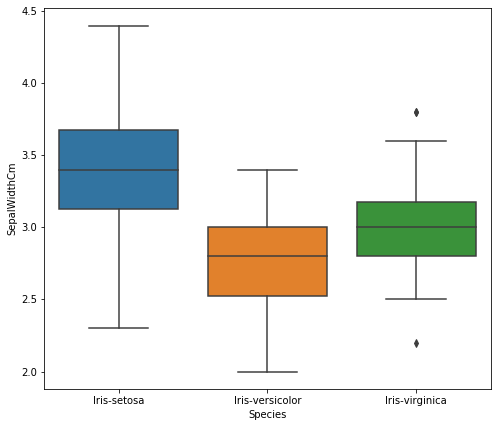

In [63]:
plt.figure(figsize=(8,7))
sns.boxplot('Species','SepalWidthCm',data=df)

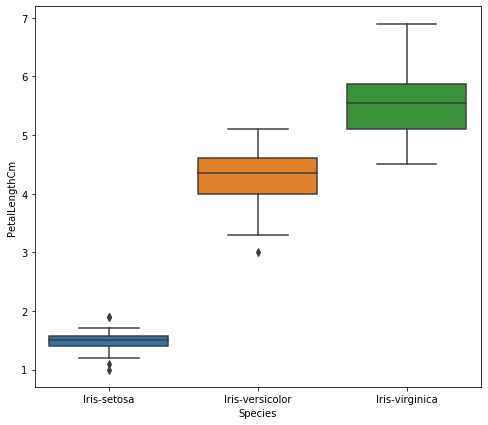

In [64]:
plt.figure(figsize=(8,7))
sns.boxplot('Species','PetalLengthCm',data=df)

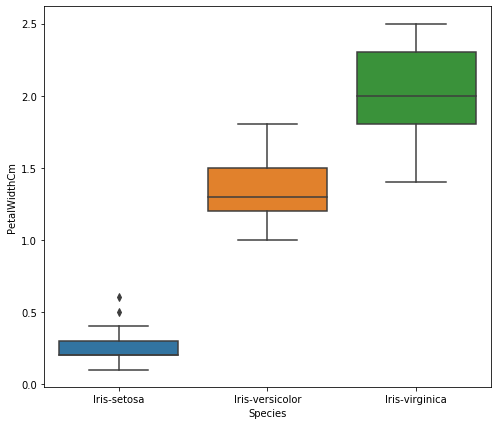

In [65]:
plt.figure(figsize=(8,7))
sns.boxplot('Species','PetalWidthCm',data=df)

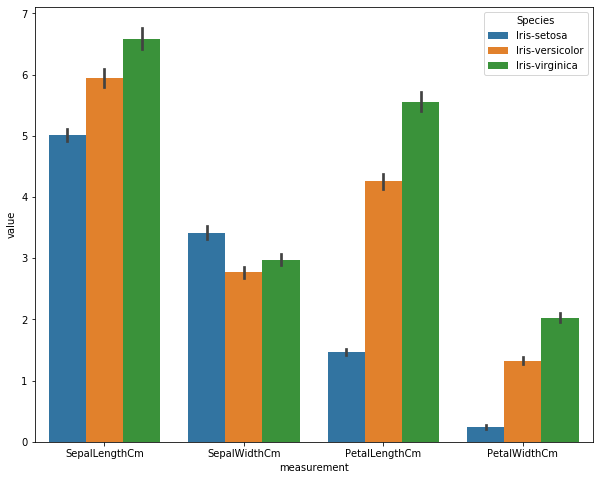

In [66]:
plt.figure(figsize=(10,8))
m = pd.melt(df,'Species',var_name='measurement')
sns.barplot('measurement','value',hue='Species',data=m)

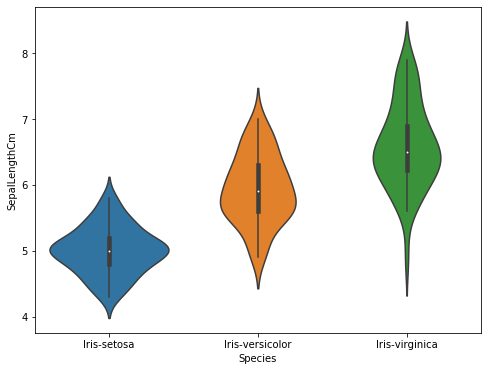

In [67]:
plt.figure(figsize=(8,6))
sns.violinplot('Species','SepalLengthCm',data=df)

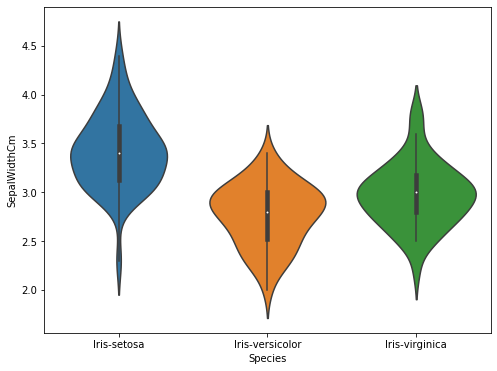

In [68]:
plt.figure(figsize=(8,6))
sns.violinplot('Species','SepalWidthCm',data=df)

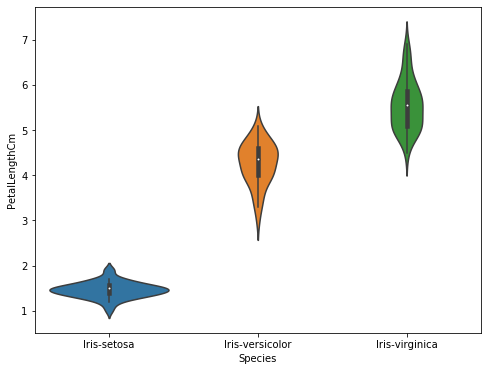

In [69]:
plt.figure(figsize=(8,6))
sns.violinplot('Species','PetalLengthCm',data=df)

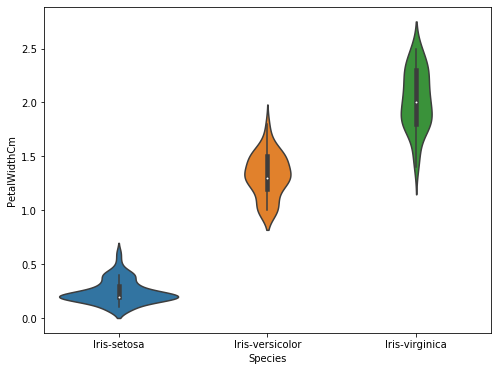

In [70]:
plt.figure(figsize=(8,6))
sns.violinplot('Species','PetalWidthCm',data=df)

- Iris Virginica have Long Sepals, Longs Petals, and Wider Petals
- Iris Setosa have short Petals and Sepals, with the Narrow Petals.
- Iris Virginica Falls Between Each of Them.

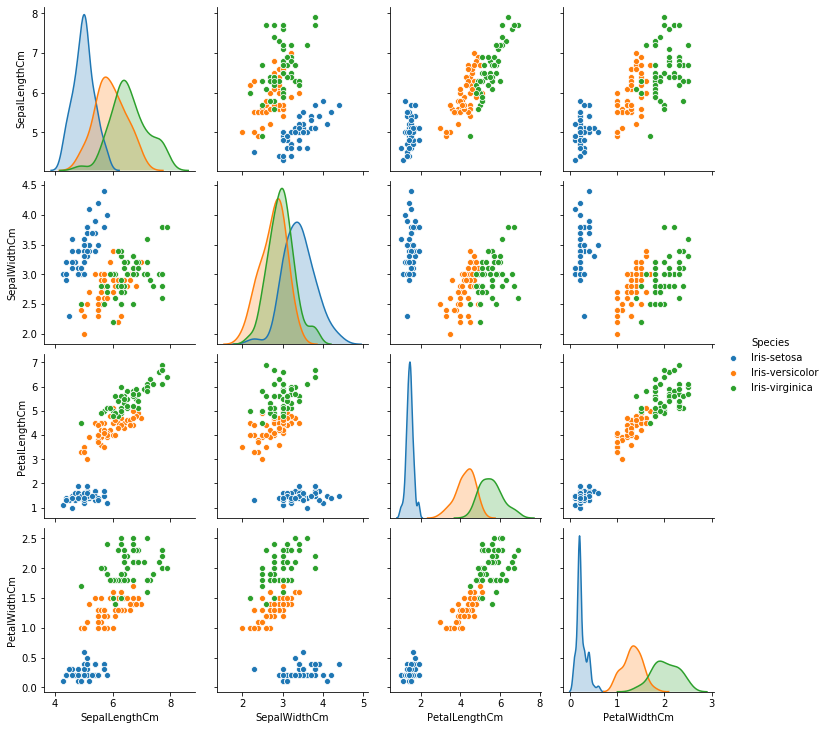

In [71]:
sns.pairplot(df,hue='Species')

Above Plot showing the Clusters and Showing the Correlation

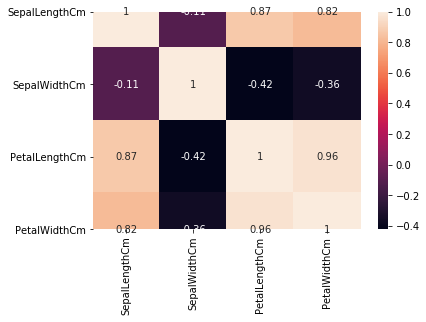

In [72]:
sns.heatmap(df.corr(),annot=True)

- Petal Length and Petal Width are highly Correlated -- 0.96
- Petal Length and Sepal Length having strong Correlation -- 0.87
- Sepal Length and Petal Width have also storng Correlation -- 0.82

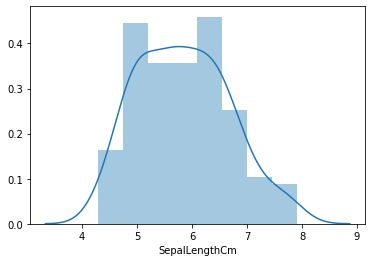

In [73]:
sns.distplot(df.SepalLengthCm)

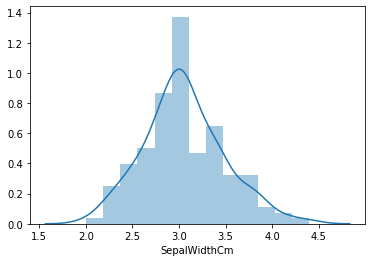

In [74]:
sns.distplot(df.SepalWidthCm)

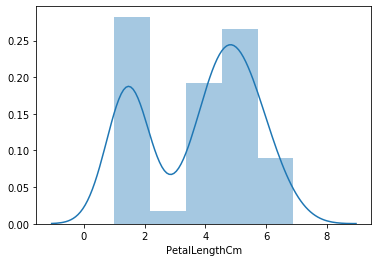

In [75]:
sns.distplot(df.PetalLengthCm)

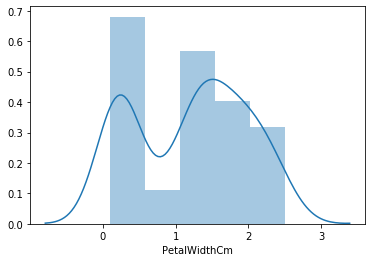

In [76]:
sns.distplot(df.PetalWidthCm)

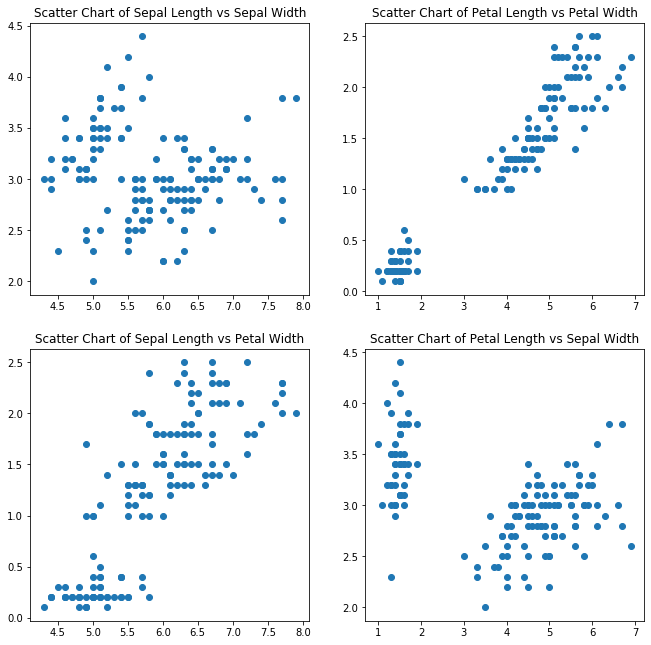

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(11,11))
axes[0,0].set_title("Scatter Chart of Sepal Length vs Sepal Width")
axes[0,0].scatter(df.SepalLengthCm,df.SepalWidthCm)
axes[0,1].set_title("Scatter Chart of Petal Length vs Petal Width")
axes[0,1].scatter(df.PetalLengthCm,df.PetalWidthCm)
axes[1,0].set_title("Scatter Chart of Sepal Length vs Petal Width")
axes[1,0].scatter(df.SepalLengthCm,df.PetalWidthCm)
axes[1,1].set_title("Scatter Chart of Petal Length vs Sepal Width")
axes[1,1].scatter(df.PetalLengthCm,df.SepalWidthCm)

#### Creating arrays to store features and dependent variable

In [78]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Splitting Dataset into training set and test set using Scikit-Learn

In [79]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [80]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)


X_train (120, 4)
y_train (120,)


In [81]:
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_test (30, 4)
y_test (30,)


### Creating KNN Model

#### Determine best number of neighbors for our KNN model to achieve highest accuracy

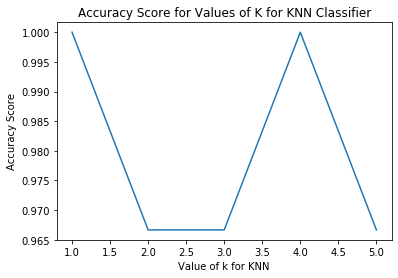

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = list(range(1, 6))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric="minkowski")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for Values of K for KNN Classifier")
plt.show()

In [86]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Testing the Accuracy of our model

In [87]:
print(classifier.predict(([[5.7,4.4,1.5,0.4]])))  # Expecting output: 'Iris-setosa'

['Iris-setosa']


#### Creating the Confusion Matrix and obtaining final accuracy score of our model 

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) * 100

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


96.66666666666667